In [1]:
# On importe les librairies dont on aura besoin pour la Question1
from utils import *

from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

In [2]:
# On charge le dataset d'entrainement et de test
Training_Set = pd.read_csv('../Data/Adult_train.csv', sep=',')
Testing_Set = pd.read_csv('../Data/Adult_test.csv', sep=',')

In [3]:
##__traitement des donnee__##

#on extrait les features des 2 dataset 
X_Training =  Training_Set.drop(['salary'],axis=1)
X_Testing =  Testing_Set.drop(['salary'],axis=1)

# on extrait les étiquettes de classe de l'échantillon d'apprentissage
Y_Training = Training_Set['salary']
Y_Testing = Testing_Set['salary']

#on extrait le nom des features pour remplacer les numero par leur nom respective dans le graphe de l'abre
names_features=[]
with open ("../Data/Adult_train.csv", "r") as f: # ouverture du fichier en mode lecture
    names_features = f.readline().strip().split(",")  # on enlève les caractères de fin de ligne et on découpe en colonnes

#on supprime le dernier nom 'salary' de la liste des noms
del names_features[len(names_features) -1]

In [4]:
##__Construction d'un modèle d'arbre de décision__##

#entrenement de l'abre avec une profondeur=3
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3, criterion="entropy")
#entrenement de l'abre avec une profondeur=3
decision_tree = decision_tree.fit(X_Training, Y_Training)

In [5]:
#Prediction des cibre(salary) depuis les donnee de test Adult_test.csv
Y_Predict = decision_tree.predict(X_Testing)

In [6]:
#exportation de l'arbre de decision avec graphviz
names_class = ["+50K", "-50K"]
build_graph = tree.export_graphviz(decision_tree, out_file=None, 
                     feature_names=names_features,
                     class_names=names_class,
                     filled=True, rounded=True,  
                     special_characters=True,) 

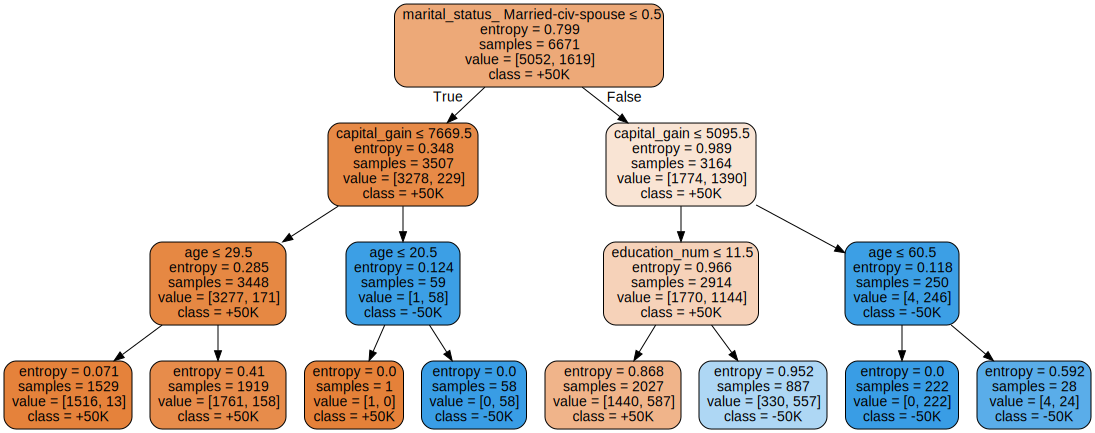

In [12]:
graph= graphviz.Source(build_graph)
graph.render("../doc/figure_PDF/task_1_Graphe_tree_(max_depth)")
DT_to_PNG(decision_tree, names_features, "../doc/figure_PNG/task_1_Graphe_tree_(max_depth)")
graph

In [8]:
#export de l'abre au format texte dans un fichier "Q1_Graphe_tree_(max_depth).txt"
r = export_text(decision_tree,names_features)
fichier = open("../Data/task_1_Graphe_tree_(max_depth).txt", "w")
fichier.write(r)
fichier.close()

In [9]:
##__Estimation de l’erreur de d'entrainement et de prévision__##

#l’erreur de d'entrainement
Error_training = 1 - decision_tree.score(X_Training, Y_Training)
print ("l'Erreur d'entrainement = ",Error_training)

#erreur de prévision
Error_testing = 1 - decision_tree.score(X_Testing, Y_Testing)
print ("l'Erreur de teste = ",Error_testing)


l'Erreur d'entrainement =  0.1636935991605456
l'Erreur de teste =  0.16299405386498778


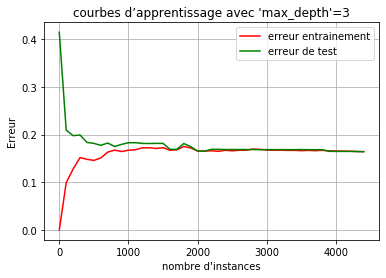

In [10]:
train_sizes =[1, 100, 500, 2000, 4447]
##__Trace du graphe representant l’erreur de d'entrainement et de prévision__##
train_sizes, train_scores, test_scores=learning_curve(decision_tree,X_Training,
                           Y_Training,train_sizes=np.arange(1,4447,100), cv=3, shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure()
plt.title("courbes d’apprentissage avec 'max_depth'=3")
plt.xlabel("nombre d'instances")
plt.ylabel("Erreur")
plt.grid()

plt.plot(train_sizes,1-train_scores_mean,label="erreur entrainement", linestyle="-", color="r")
plt.plot(train_sizes,1-test_scores_mean,label="erreur de test", linestyle="-", color="g")


plt.legend()
plt.savefig('../doc/figure_PDF/task_1_courbes_apprentissage_avec_max_depth=3.pdf')
plt.savefig('../doc/figure_PNG/task_1_courbes_apprentissage_avec_max_depth=3.png')

In [11]:
#deux meme methode de determiner la precision: donne le meme resulta. on peut utiliser ce resultat pr determiner
#l'erreur = 1 - precision
decision_tree.score(X_Testing, Y_Testing)
metrics.accuracy_score(Y_Testing, Y_Predict)

0.8370059461350122